#COVID
<font color='orange'>**If you attended the class in person, please don't forget to fill in [this form](https://docs.google.com/forms/d/e/1FAIpQLSfA7p1lxOhaXLw_2jO1OBvOzqheS0kjzm968S4uciXQKh5__g/viewform)**

# Regularization in Machine Learning

Please, make a copy of this colaboratory in order to be able to make changes **(File -> Save a copy in Drive)**.

## Homework #4

This colaboratory also contains Homework #4 of the Machine Learning course, which is due **November 1, midnight (23:59 EEST time)**. To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.


## Submission's rules:
* Please, submit only .ipynb that you extract from the colaboratory!
* Links to your colaboratory will not be accepted as a solution!
* Run your colab before submitting (no output - no grades).
* Do not change the description of tasks (even if there is a typo|mistake|etc).
* Remove unnecessary long prints after debugging.
* Each task should be solved right under the question of the task and not elsewhere.
* Solutions to both regular and bonus exercises should be submitted in one IPYNB file.

In [ ]:
import pandas as pd
import numpy as np

import os

import warnings
warnings.filterwarnings('ignore') #does not really work anyway :)

# Regularisation 

## Simple linear regression vs ridge regression and lasso regression. 

Toy 2D example returns to help us with regularisation

In [ ]:
# Note that distance and fare_amount were substituted with `x` and `y` for simplification
example_data = pd.DataFrame({'x':[1,2,3,4,5], 'y':[2,4,5,4,5]})
example_data

,x,y
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [ ]:
# Cannot live without plotnine :)
!pip install plotnine
from plotnine import *

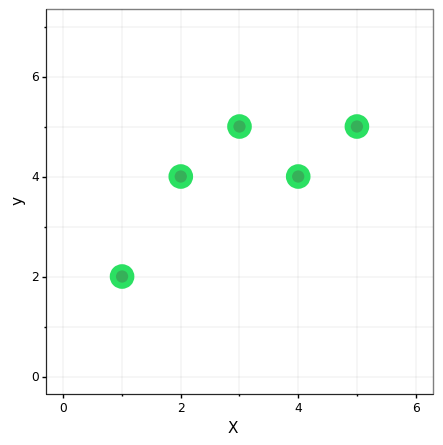

<ggplot: (-9223363265554120753)>

In [ ]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'X',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig # I know, I am super good at making long code short...

**Classroom exercise**: find value of **`intercept`** ($w_0$) and **`slope`** ($w_1$) using the following equations:

 <center><font size = 4> 
$w_1 = \dfrac{\sum(x-\overline{x})(y-\overline{y})}{\sum(x-\overline{x})^2}$
<center><font size = 4> 
$ $
<center><font size = 4> 
$w_0 = \overline{y} - w_1\cdot\overline{x}$ 
  

In [ ]:
x = example_data.x
y = example_data.y

##### YOUR CODE STARTS #####
w1 = ((x - x.mean())*(y - y.mean())).sum()/((x - x.mean())**2).sum()
w0 = y.mean() - w1*x.mean()
##### YOUR CODE ENDS ##### (please do not delete this line)
print(f"w1 = {w1}; intercept = {w0}, while the correct values are w1 = 0.6 and intercept = 2.2")

w1 = 0.6; intercept = 2.2, while the correct values are w1 = 0.6 and intercept = 2.2


Let's train (again) a linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(example_data[['x']], example_data[['y']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_

array([[0.6]])

Let's visualise this regression line:

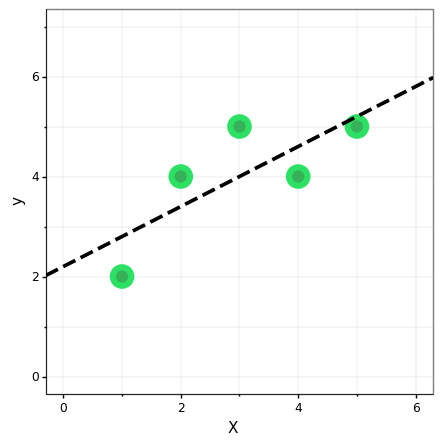

<ggplot: (8771300656946)>

In [ ]:
fig = fig + geom_abline(intercept = w0, slope = w1, color="black", linetype="dashed", size=1.5)
fig

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [ ]:
# Initialising all three regression models
lr = LinearRegression()

lambda_ = 1
##### YOUR CODE STARTS #####
# Ridge regression
lr_ridge = Ridge(lambda_) # L2 regularisation + Linear Regression

# Lasso 
lr_lasso = Lasso(lambda_) # L1 regularisation + Linear Regression
##### YOUR CODE ENDS ##### (please do not delete this line)

In [ ]:
#fit linear regression
lr.fit(example_data[['x']], example_data[['y']])

##### YOUR CODE STARTS #####
#fit Ridge and Lasso regressions
lr_ridge.fit(example_data[['x']], example_data[['y']])
lr_lasso.fit(example_data[['x']], example_data[['y']])
##### YOUR CODE ENDS ##### (please do not delete this line)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

Let's print our weights and intercepts for each model:

In [ ]:
print(f'Sklearn Linear regression w1 is {lr.coef_} and intercept is {lr.intercept_}')
print(f'Sklearn Ridge regression w1 is {lr_ridge.coef_} and intercept is {lr_ridge.intercept_}')
print(f'Sklearn Lasso regression w1 is {lr_lasso.coef_} and intercept is {lr_lasso.intercept_}')

Sklearn Linear regression w1 is [[0.6]] and intercept is [2.2]
Sklearn Ridge regression w1 is [[0.54545455]] and intercept is [2.36363636]
Sklearn Lasso regression w1 is [0.1] and intercept is [3.7]


Now we can add **Ridge** and **LASSO** regression to our figure. No need to add a baseline linear regression, as we have already done it. First let's add Ridge regression line in red.

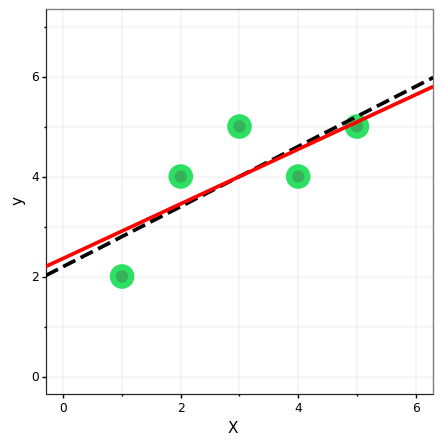

<ggplot: (-9223363265555172783)>

In [ ]:
fig = fig + geom_abline(intercept = lr_ridge.intercept_, slope = lr_ridge.coef_[0], color="red", linetype="solid", size=1.5)
fig

Now Lasso in blue:

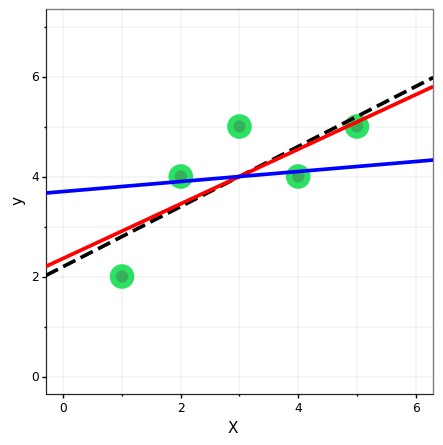

<ggplot: (-9223363265557820742)>

In [ ]:
fig = fig + geom_abline(intercept = lr_lasso.intercept_, slope = lr_lasso.coef_[0], color="blue", linetype="solid", size=1.5)
fig

This was way too easy. Let's add more features to our toy example by producing multiple polynomials form the original distance.

In [ ]:
example_data

,x,y
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [ ]:
example_data['x^2'] = example_data.x**2
example_data['x^3'] = example_data.x**3
example_data['x^4'] = example_data.x**4

In [ ]:
example_data

,x,y,x^2,x^3,x^4
0,1,2,1,1,1
1,2,4,4,8,16
2,3,5,9,27,81
3,4,4,16,64,256
4,5,5,25,125,625


In [ ]:
lr = LinearRegression()

# Regularization strength
lambda_ = 1

# Ridge regression (L2)
lr_ridge = Ridge(lambda_)

# Lasso regression (L1)
lr_lasso = Lasso(lambda_)

Here we should use new features to fit all three models:

In [ ]:
lr.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_lasso.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

Printing out resulting coefficients, what can you notice?

In [ ]:
print(f'Baseline regression: [{lr.coef_}, {round(lr.intercept_[0], 8)}]')
print(f'Ridge regression, forces coefficients to be small: [{lr_ridge.coef_}, {round(lr_ridge.intercept_[0], 8)}]')
print(f'Lasso regression, acts as a feature selection: [{lr_lasso.coef_}, {round(lr_lasso.intercept_[0], 8)}]')

Baseline regression: [[[-8.75        7.79166667 -2.25        0.20833333]], 5.0]
Ridge regression, forces coefficients to be small: [[[ 0.3882215   0.61877466 -0.20687874  0.0184773 ]], 1.72050238]
Lasso regression, acts as a feature selection: [[ 0.          0.          0.05608653 -0.00829621], 3.1005046]


To visualise the resulting trends we need a synthetic data for visualisation:

In [ ]:
visualisation_data = pd.DataFrame({'x': np.linspace(start=0, stop=6, num=61),
                          'x^2': np.linspace(start=0, stop=6, num=61)**2,
                          'x^3': np.linspace(start=0, stop=6, num=61)**3,
                          'x^4': np.linspace(start=0, stop=6, num=61)**4})

visualisation_data.head()

,x,x^2,x^3,x^4
0,0.0,0.00,0.000,0.0000
1,0.1,0.01,0.001,0.0001
2,0.2,0.04,0.008,0.0016
3,0.3,0.09,0.027,0.0081
4,0.4,0.16,0.064,0.0256


Use function `predict` to produce additional columns for each type of model

In [ ]:
##### YOUR CODE STARTS #####
visualisation_data['lr_y'] = lr.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])
visualisation_data['lr_ridge_y'] = lr_ridge.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])
visualisation_data['lr_lass_y'] = lr_lasso.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])
##### YOUR CODE ENDS ##### (please do not delete this line)
visualisation_data

,x,x^2,x^3,x^4,lr_y,lr_ridge_y,lr_lass_y
0,0.0,0.00,0.000,0.0000,5.000000,1.720502,3.100505
1,0.1,0.01,0.001,0.0001,4.200688,1.765307,3.100560
2,0.2,0.04,0.008,0.0016,3.544000,1.821272,3.100940
3,0.3,0.09,0.027,0.0081,3.017188,1.887222,3.101952
4,0.4,0.16,0.064,0.0256,2.608000,1.962028,3.103882
...,...,...,...,...,...,...,...
56,5.6,31.36,175.616,983.4496,10.096000,5.139591,4.791290
57,5.7,32.49,185.193,1055.6001,11.508688,5.229498,4.729854
58,5.8,33.64,195.112,1131.6496,13.120000,5.333070,4.655254
59,5.9,34.81,205.379,1211.7361,14.945188,5.451616,4.566680


We can now visualise these trends, each line in its own colour (red - Ridge, blue - LASSO, black - simple linear regression).

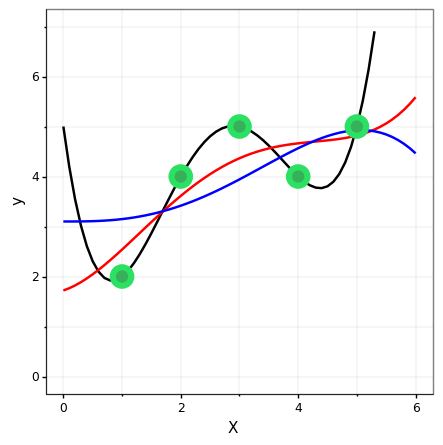

<ggplot: (8771296861146)>

In [ ]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_y'), size = 1, colour = 'black') +
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_ridge_y'), size = 1, colour = 'red') +
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_lass_y'), size = 1, colour = 'blue') +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'X',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black')) + 
    guides(size = False)
)
fig

Here, we are playing around with `lambda_` coefficients for Ridge regression. Let's see where this leads us:

In [ ]:
# Ridge regression (L2)
lr_ridge_01 = Ridge(0.1)
lr_ridge_05 = Ridge(0.5)
lr_ridge_08 = Ridge(0.8)
lr_ridge_1 = Ridge(1)
lr_ridge_1000 = Ridge(1000)

# Train each one of these models on example_data
lr_ridge_1000.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge_01.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge_05.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge_08.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge_1.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])

# Predict each one of these models on visualisation_data to visualise them
visualisation_data['lr_ridge_01_y'] = lr_ridge_01.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])
visualisation_data['lr_ridge_05_y'] = lr_ridge_05.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])
visualisation_data['lr_ridge_08_y'] = lr_ridge_08.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])
visualisation_data['lr_ridge_1_y'] = lr_ridge_1.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])
visualisation_data['lr_ridge_1000_y'] = lr_ridge_1000.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])

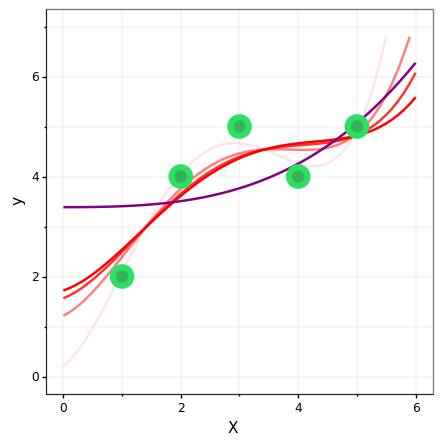

<ggplot: (-9223363265557858851)>

In [ ]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_ridge_01_y'), size = 1, colour = 'red', alpha = 0.1) +
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_ridge_05_y'), size = 1, colour = 'red', alpha = 0.5) +
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_ridge_08_y'), size = 1, colour = 'red', alpha = 0.8) +
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_ridge_1_y'), size = 1, colour = 'red', alpha = 1) +
       geom_path(data =   visualisation_data, mapping = aes(x = 'x', y = 'lr_ridge_1000_y'), size = 1, colour = 'purple', alpha = 1) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'X',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black')) + 
    guides(size = False)
)
fig

In [ ]:
print(f'Baseline regression: [{lr.coef_}, {round(lr.intercept_[0], 8)}]')
print(f'Ridge regression(0.1): [{lr_ridge_01.coef_}, {round(lr_ridge_01.intercept_[0], 8)}]')
print(f'Ridge regression(0.5): [{lr_ridge_05.coef_}, {round(lr_ridge_05.intercept_[0], 8)}]')
print(f'Ridge regression(0.8): [{lr_ridge_08.coef_}, {round(lr_ridge_08.intercept_[0], 8)}]')
print(f'Ridge regression(1.0): [{lr_ridge_1.coef_}, {round(lr_ridge_1.intercept_[0], 8)}]')
print(f'Ridge regression(1000): [{lr_ridge_1000.coef_}, {round(lr_ridge_1000.intercept_[0], 8)}]')

Baseline regression: [[[-8.75        7.79166667 -2.25        0.20833333]], 5.0]
Ridge regression(0.1): [[[ 0.91918473  1.56762301 -0.67997714  0.07350262]], 0.20575024]
Ridge regression(0.5): [[[ 0.57826166  0.91934053 -0.3591395   0.03625419]], 1.21517709]
Ridge regression(0.8): [[[ 0.44679205  0.71038556 -0.25332825  0.02390007]], 1.56552074]
Ridge regression(1.0): [[[ 0.3882215   0.61877466 -0.20687874  0.0184773 ]], 1.72050238]
Ridge regression(1000): [[[0.0019322  0.00594611 0.01132294 0.0001677 ]], 3.38642867]


Optimal value for `lambda_` term should be found via cross-validation algorithm.

## Homework Exercise 1 (3 points): ElasticNet algorithm combines both Ridge and LASSO regression.
<font color='red'> In the class we discussed Ridge and Lasso regression algorithms, which are basically, L2 and L1 regularisations applied to Linear Regression model. ElasticNet is a method that combines both L2 and L1 regularisations under one model. ElasticNet adds both L2 and L1 norms to the error function. Here you should train and visualise ElasticNet model on the toy dataset. </font>

<font color='red'> **(Homework exercise 1- a)** Train ElasticNet from `sklearn` on example data. Visualise it using artificial visualisation data. **(1 point)**. </font>


In [ ]:
# Let's regenerate training data one more time
example_data = pd.DataFrame({'x':[1,2,3,4,5], 'y':[2,4,5,4,5]})
example_data['x^2'] = example_data.x**2
example_data['x^3'] = example_data.x**3
example_data['x^4'] = example_data.x**4

In [ ]:
from sklearn.linear_model import ElasticNet

# Regularization strength
lambda_ = 1

##### YOUR CODE STARTS #####

# Initialise ElasticNet regression (L1/L2)
lr_elastic = ElasticNet(lambda_)

# Fit ElasticNet to our example_data
lr_elastic.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])

# Predict visualisation data
visualisation_data['lr_elastic_y'] = lr_elastic.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])
visualisation_data.head()
##### YOUR CODE ENDS ##### (please do not delete this line)

,x,x^2,x^3,x^4,lr_y,lr_ridge_y,lr_lass_y,lr_ridge_01_y,lr_ridge_05_y,lr_ridge_08_y,lr_ridge_1_y,lr_ridge_1000_y,lr_elastic_y
0,0.0,0.00,0.000,0.0000,5.000000,1.720502,3.100505,0.205750,1.215177,1.565521,1.720502,3.386429,2.947695
1,0.1,0.01,0.001,0.0001,4.200688,1.765307,3.100560,0.312672,1.281841,1.617053,1.765307,3.386693,2.947772
2,0.2,0.04,0.008,0.0016,3.544000,1.821272,3.100940,0.446970,1.364788,1.681306,1.821272,3.387144,2.948302
3,0.3,0.09,0.027,0.0081,3.017188,1.887222,3.101952,0.604828,1.461993,1.756847,1.887222,3.387851,2.949711
4,0.4,0.16,0.064,0.0256,2.608000,1.962028,3.103882,0.782607,1.571519,1.842298,1.962028,3.388882,2.952392


<font color='red'> **(Homework exercise 1- b)** Visualise all four regression trends (baseline, LASSO, Ridge and ElasticNet) on the same figure. Highlight ElasticNet in <font color='#F1C40F'>yellow</font>. **(1 point)**. </font>


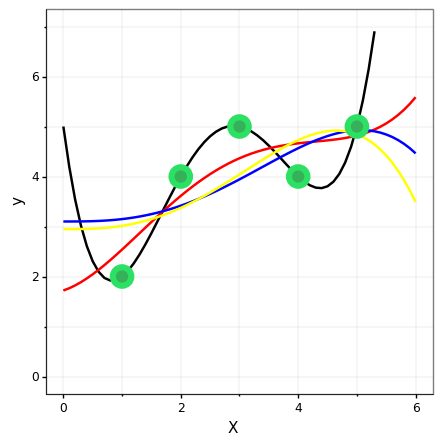

<ggplot: (-9223363265554839138)>

In [ ]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
       ##### YOUR CODE STARTS #####
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_y'), size = 1, colour = 'black') +
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_ridge_y'), size = 1, colour = 'red') +
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_lass_y'), size = 1, colour = 'blue') +
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_elastic_y'), size = 1, colour = 'yellow') +
       ##### YOUR CODE ENDS ##### (please do not delete this line)
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'X',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black')) + 
    guides(size = False)
)
fig


<font color='red'> **(Homework exercise 1- c)** Print out ElasticNet coefficients and intercept, compare it to coefficients and intercept of other regressions. Which one ElasticNet seems to be more similar to? Which parameter in `sklearn.ElasticNet` is responsible for the difference between Ridge and LASSO? **(1 point)**. </font>

In [ ]:
##### YOUR CODE STARTS #####
print(f'Baseline regression intercept {round(lr.intercept_[0], 8)} and coefficients{lr.coef_}')
print(f'Lasso regression intercept {round(lr_lasso.intercept_[0], 8)} and coefficients {lr_lasso.coef_}')
print(f'Ridge regression intercept {round(lr_ridge.intercept_[0], 8)} and coefficients{lr_ridge.coef_} ')
print(f'ElasticNet regression intercept {round(lr_elastic.intercept_[0], 8)} and coefficients{lr_elastic.coef_}')
##### YOUR CODE ENDS ##### (please do not delete this line)

Baseline regression intercept 5.0 and coefficients[[-8.75        7.79166667 -2.25        0.20833333]]
Lasso regression intercept 3.1005046 and coefficients [ 0.          0.          0.05608653 -0.00829621]
Ridge regression intercept 1.72050238 and coefficients[[ 0.3882215   0.61877466 -0.20687874  0.0184773 ]] 
ElasticNet regression intercept 2.9476951 and coefficients[ 0.          0.          0.07844547 -0.01265445]


<font color='red'> Your textual answer goes here: ElasticNet seems quite similar to the Lasso regression. ElasticNet is a combination of Lasso and Ridge regression, but there is a coefficient commonly named 'l1_ratio' who managed the differenc beetween Lasso and Ridge. </font>

# L2 and L1 regularization as weight decay in the Neural Networks

## We shall use CIFAR10 dataset


In [ ]:
# No loading TF here, hurrah!!

# A bit of setup again
import numpy as np
import matplotlib.pyplot as plt

# loading in the cifar10 dataset
from keras.datasets import cifar10

# Keras comes with built-in loaders for common datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# shorten dataset for quicker training
X_train = X_train[:25000]
y_train = y_train[:25000]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

170500096/170498071 [==============================] - 11s 0us/step
Train data shape:  (25000, 32, 32, 3)
Train labels shape:  (25000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


In [ ]:
# Auxiliary function for plotting performance curves (loss and accuracy)
def plot_curves(history):
  plt.figure(figsize=(16, 6))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Training', 'Validation'])
  plt.title('Loss')

  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Training', 'Validation'])
  plt.title('Accuracy')

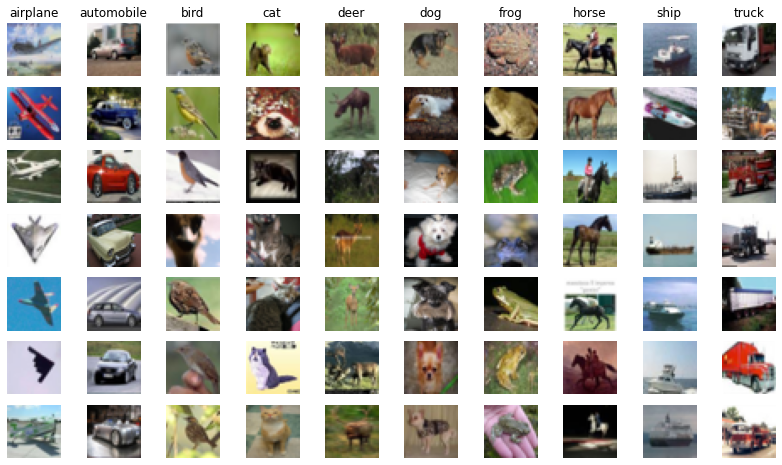

In [ ]:
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
# "Names" of classes:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = len(class_names)

samples_per_class = 7 # Number of images from each class we want to see
for y, cls in enumerate(class_names):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx], plt.get_cmap('gray'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [ ]:
mu = X_train.mean(axis=(0,1,2)) # finds mean of R, G and B separately
std = X_train.std(axis=(0,1,2)) # same for std
X_train_norm = (X_train - mu)/std
X_test_norm = (X_test - mu)/std

What if we use L2 regularisation or in other words weight decay (don't confuse with learning rate decay, these are different things)

In [ ]:
from keras.layers import Input, Conv2D, Activation, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout
from keras import regularizers
from keras import optimizers
from keras import Sequential

def define_model(lambda_):
  model = Sequential()
  model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambda_), input_shape=(32, 32, 3)))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambda_)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambda_)))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambda_)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambda_)))
  model.add(Activation('relu'))
  model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambda_)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(lambda_)))

  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  return(model)

def define_model_dropout(dropout_rate = 0):
  model = Sequential()
  model.add(Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 3)))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3,3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(dropout_rate))

  model.add(Conv2D(64, (3,3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3,3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(dropout_rate))

  model.add(Conv2D(128, (3,3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(128, (3,3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(dropout_rate))
  
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(dropout_rate))

  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  return(model)

By setting `lambda_` to 0 we effectively use no weight decay. Let's see what our network is capable of without L2 regularisation.

In [ ]:
# lambda_ = 0 to indicate no regularisation
model = define_model(0)

# we can use sparse categorical crossentropy since our classes are mutually exclusive
# also we don't need to turn labels into the categorical one-hot coded variable  
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0

In [ ]:
# As last time we fit the model
# fit function returns History object, which keeps record of all losses and accuracies that we can plot later
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=15, validation_split=0.2)

Epoch 1/15
313/313 [==============================] - 6s 21ms/step - loss: 1.6689 - accuracy: 0.3826 - val_loss: 1.4171 - val_accuracy: 0.4794
Epoch 2/15
313/313 [==============================] - 6s 18ms/step - loss: 1.2297 - accuracy: 0.5559 - val_loss: 1.1546 - val_accuracy: 0.5884
Epoch 3/15
313/313 [==============================] - 6s 18ms/step - loss: 0.9916 - accuracy: 0.6481 - val_loss: 0.9605 - val_accuracy: 0.6638
Epoch 4/15
313/313 [==============================] - 6s 18ms/step - loss: 0.8271 - accuracy: 0.7052 - val_loss: 0.8535 - val_accuracy: 0.7030
Epoch 5/15
313/313 [==============================] - 6s 18ms/step - loss: 0.6823 - accuracy: 0.7612 - val_loss: 0.8749 - val_accuracy: 0.7064
Epoch 6/15
313/313 [==============================] - 6s 18ms/step - loss: 0.5724 - accuracy: 0.8015 - val_loss: 0.8847 - val_accuracy: 0.7120
Epoch 7/15
313/313 [==============================] - 6s 18ms/step - loss: 0.4635 - accuracy: 0.8371 - val_loss: 0.8934 - val_accuracy: 0.7182

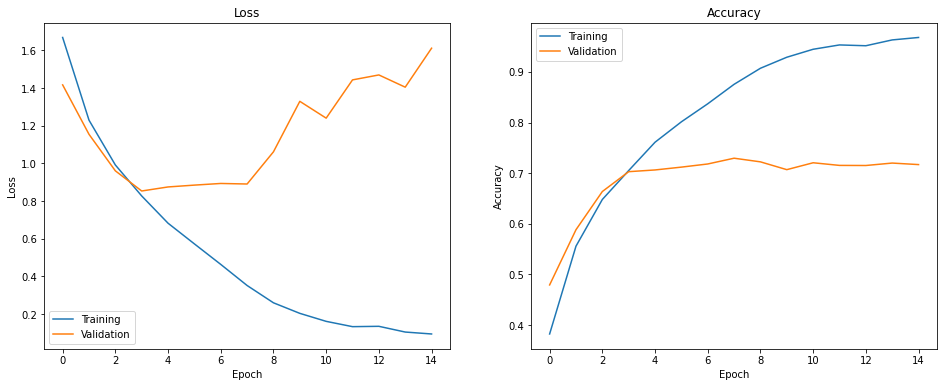

In [ ]:
# plot the trajectories
plot_curves(history)

In [ ]:
# Loss and accuracy on test set
model.evaluate(X_test_norm, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.7390 - accuracy: 0.6992


[1.7390023469924927, 0.6991999745368958]

Now let's add some (0.003) **L2** regularisation to our model

In [ ]:
# Adding the L2 regularisation:
model = define_model(0.003)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])

Train again

In [ ]:
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=30, validation_split=0.2)

Epoch 1/30
313/313 [==============================] - 6s 19ms/step - loss: 2.1722 - accuracy: 0.3512 - val_loss: 1.7543 - val_accuracy: 0.4610
Epoch 2/30
313/313 [==============================] - 6s 18ms/step - loss: 1.6466 - accuracy: 0.4850 - val_loss: 1.5515 - val_accuracy: 0.4948
Epoch 3/30
313/313 [==============================] - 6s 19ms/step - loss: 1.4702 - accuracy: 0.5405 - val_loss: 1.4276 - val_accuracy: 0.5546
Epoch 4/30
313/313 [==============================] - 6s 18ms/step - loss: 1.3777 - accuracy: 0.5767 - val_loss: 1.3290 - val_accuracy: 0.5994
Epoch 5/30
313/313 [==============================] - 6s 19ms/step - loss: 1.3025 - accuracy: 0.6087 - val_loss: 1.2796 - val_accuracy: 0.6068
Epoch 6/30
313/313 [==============================] - 6s 19ms/step - loss: 1.2364 - accuracy: 0.6326 - val_loss: 1.2137 - val_accuracy: 0.6346
Epoch 7/30
313/313 [==============================] - 6s 19ms/step - loss: 1.1868 - accuracy: 0.6511 - val_loss: 1.2198 - val_accuracy: 0.6376

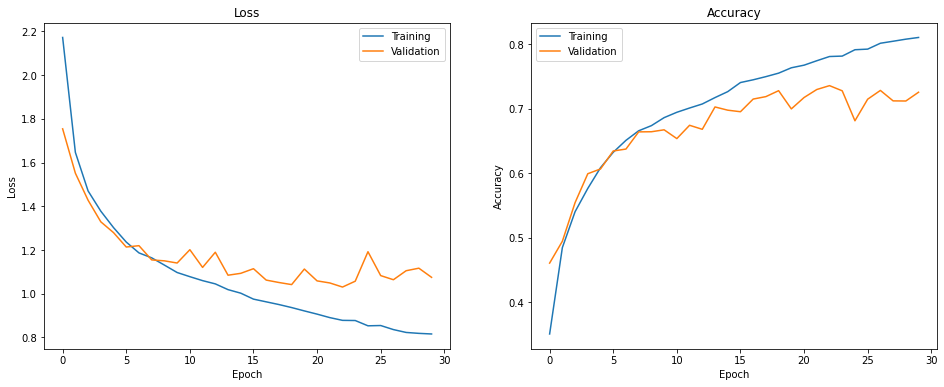

In [ ]:
plot_curves(history)

In [ ]:
# Loss and accuracy on test set
model.evaluate(X_test_norm, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.0998 - accuracy: 0.7255


[1.0998321771621704, 0.7254999876022339]

In [ ]:
# Using dropout instead of L2:
model = define_model_dropout(0.25)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 6s 21ms/step - loss: 1.8148 - accuracy: 0.3223 - val_loss: 1.4656 - val_accuracy: 0.4652
Epoch 2/20
313/313 [==============================] - 6s 19ms/step - loss: 1.3970 - accuracy: 0.4881 - val_loss: 1.2767 - val_accuracy: 0.5428
Epoch 3/20
313/313 [==============================] - 6s 19ms/step - loss: 1.2087 - accuracy: 0.5642 - val_loss: 1.0748 - val_accuracy: 0.6230
Epoch 4/20
313/313 [==============================] - 6s 19ms/step - loss: 1.0716 - accuracy: 0.6176 - val_loss: 1.0396 - val_accuracy: 0.6228
Epoch 5/20
313/313 [==============================] - 6s 19ms/step - loss: 0.9651 - accuracy: 0.6528 - val_loss: 0.9226 - val_accuracy: 0.6688
Epoch 6/20
313/313 [==============================] - 6s 19ms/step - loss: 0.8871 - accuracy: 0.6881 - val_loss: 0.8592 - val_accuracy: 0.6950
Epoch 7/20
313/313 [==============================] - 6s 19ms/step - loss: 0.8226 - accuracy: 0.7085 - val_loss: 0.8492 - val_accuracy: 0.7008

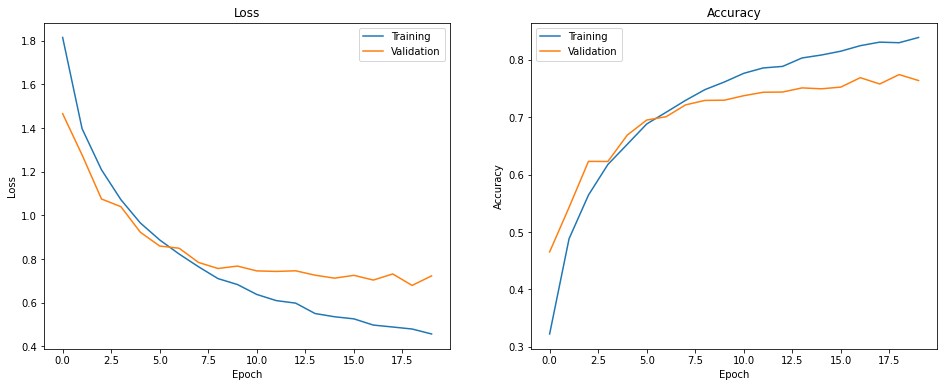

In [ ]:
# plot the trajectories
plot_curves(history)

In [ ]:
# Loss and accuracy on test set
model.evaluate(X_test_norm, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.7576 - accuracy: 0.7583


[0.7576183080673218, 0.7583000063896179]

## Homework exercise 2 (4 points): searching for good dropout rate
<font color='red'> Use `sklearn` function (`KFold`) for cross-validation to find the best possible dropout rate for the neural network we used in the class (that you call via `define_model_dropout`). </font>

<font color='red'> **(Homework exercise 2- a)** Run cross-validation by filling in the gaps and collect validation accuracy scores for each dropout rate. **(2 points)**. </font>


In [ ]:
# A bit of setup again
import numpy as np
import matplotlib.pyplot as plt

# loading in the cifar10 dataset
from keras.datasets import cifar10

# Keras comes with built-in loaders for common datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# shorten dataset for quicker training
X_train = X_train[:25000]
y_train = y_train[:25000]

mu = X_train.mean(axis=(0,1,2)) # finds mean of R, G and B separately
std = X_train.std(axis=(0,1,2)) # same for std
X_train_norm = (X_train - mu)/std
X_test_norm = (X_test - mu)/std

In [ ]:
from sklearn.model_selection import KFold
dropout_rates = [0.0, 0.1, 0.25, 0.5, 0.99] # feel free to choose other values to loop over
#dropout_rates = [0.1,0.25] 

# you can collect both accuracy and loss if you like, 
# but loss is influenced by the regularisation itself, so maybe less informative
val_fold_acc = np.zeros(len(dropout_rates))
val_fold_loss = np.zeros(len(dropout_rates))

for i, dropout_rate in enumerate(dropout_rates):
  print(f'Validation loss for dropout rate = {dropout_rate}...')
  ##### YOUR CODE STARTS #####
  # 4-fold cross validation
  # Here we are using sklearn Cross Validation Function called KFold
  kf = KFold(n_splits=4, random_state=111)

  # Do not change this line, we initialize empty lists
  fold_acc = []
  fold_loss = []
  for train_index, val_index in kf.split(X_train_norm):

    # split data into train_X, train_y and val_X, val_y depending on the fold:
    train_X = X_train_norm[train_index]
    train_y = y_train[train_index]
    val_X = X_train_norm[val_index]
    val_y = y_train[val_index]

    # train the neural network with dropout_rate
    model = define_model_dropout(dropout_rate)

    # compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])

    # fit the neural network on training data
    # number of epochs is tricky, if you choose too little the performance will be unstable
    # if you choose too large, it will take ages to complete...
    history = model.fit(train_X, train_y, batch_size=64, epochs=5, validation_split=0.2)

    # calculate accuracy for this fold
    fold_acc.append(model.evaluate(val_X, val_y)[1])
    
    # and loss
    fold_loss.append(model.evaluate(val_X, val_y)[0])
    ##### YOUR CODE ENDS ##### (please do not delete this line)

  print(f'Average validation accuracy for {dropout_rate} is {np.mean(fold_acc)}')
  val_fold_acc[i] = np.mean(fold_acc)
  val_fold_loss[i] = np.mean(fold_loss)

  
  

print("EENNDD")
print("val_fold_acc : ", val_fold_acc)
print("val_fold_loss : ", val_fold_loss)

Validation loss for dropout rate = 0.0...
Epoch 1/5
235/235 [==============================] - 5s 21ms/step - loss: 1.7348 - accuracy: 0.3656 - val_loss: 1.4082 - val_accuracy: 0.5000
Epoch 2/5
235/235 [==============================] - 4s 19ms/step - loss: 1.3325 - accuracy: 0.5196 - val_loss: 1.2267 - val_accuracy: 0.5493
Epoch 3/5
235/235 [==============================] - 4s 19ms/step - loss: 1.1044 - accuracy: 0.6026 - val_loss: 1.0806 - val_accuracy: 0.6133
Epoch 4/5
235/235 [==============================] - 4s 19ms/step - loss: 0.9373 - accuracy: 0.6726 - val_loss: 1.0348 - val_accuracy: 0.6352
Epoch 5/5
196/196 [==============================] - 1s 5ms/step - loss: 1.0264 - accuracy: 0.6448
Epoch 1/5
235/235 [==============================] - 5s 20ms/step - loss: 1.7665 - accuracy: 0.3471 - val_loss: 1.4745 - val_accuracy: 0.4491
Epoch 2/5
235/235 [==============================] - 4s 19ms/step - loss: 1.3536 - accuracy: 0.5094 - val_loss: 1.1919 - val_accuracy: 0.5600
Epoch 3

<font color='red'> **(Homework exercise 2- b)** Visualise validation accuracy and loss for different dropout rates, report the best one. **(1 point)**. </font>


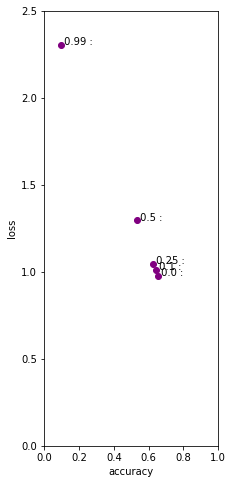

In [ ]:
##### YOUR CODE STARTS #####
fig, ax = plt.subplots(figsize=(8, 8)) 
ax.set_aspect('equal')

ax.set_xlabel('accuracy')
ax.set_ylabel('loss')

ax.set_xlim(0, 1)
ax.set_ylim(0, 2.5)

for i, label in enumerate(dropout_rates):
        # TODO: add labels to each data point
        x = val_fold_acc[i]
        y = val_fold_loss[i]
        plt.plot(x,y, marker='o', markersize=6, color="purple")
        plt.annotate(f' {dropout_rates[i]} :', xy=(x, y))
##### YOUR CODE ENDS ##### (please do not delete this line)

We know that the best is a bigger accuracy and a lower loss, so the best dropout rate is 0.1

<font color='red'> **(Homework exercise 2- c)** Re-train the network using the reported in the **(b)**, dropout rate. Visualise performance curves and interpret the results. (if results did not improve, no need to re-run the process again, just comment on the results). **(1 point)**. </font>

In [ ]:
##### YOUR CODE STARTS #####
# Define the model with found dropout rate
model = define_model_dropout(0.1)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])
# Fit the model; returns History object
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=20, validation_split=0.2)
##### YOUR CODE ENDS ##### (please do not delete this line)

Epoch 1/20
313/313 [==============================] - 6s 20ms/step - loss: 1.7280 - accuracy: 0.3505 - val_loss: 1.4217 - val_accuracy: 0.4760
Epoch 2/20
313/313 [==============================] - 6s 19ms/step - loss: 1.3332 - accuracy: 0.5105 - val_loss: 1.2012 - val_accuracy: 0.5674
Epoch 3/20
313/313 [==============================] - 6s 19ms/step - loss: 1.1434 - accuracy: 0.5911 - val_loss: 1.0985 - val_accuracy: 0.6154
Epoch 4/20
313/313 [==============================] - 6s 19ms/step - loss: 0.9927 - accuracy: 0.6444 - val_loss: 0.9478 - val_accuracy: 0.6652
Epoch 5/20
313/313 [==============================] - 6s 19ms/step - loss: 0.8586 - accuracy: 0.6969 - val_loss: 0.9237 - val_accuracy: 0.6708
Epoch 6/20
313/313 [==============================] - 6s 19ms/step - loss: 0.7538 - accuracy: 0.7377 - val_loss: 0.8251 - val_accuracy: 0.7096
Epoch 7/20
313/313 [==============================] - 6s 19ms/step - loss: 0.6694 - accuracy: 0.7624 - val_loss: 0.7986 - val_accuracy: 0.7218

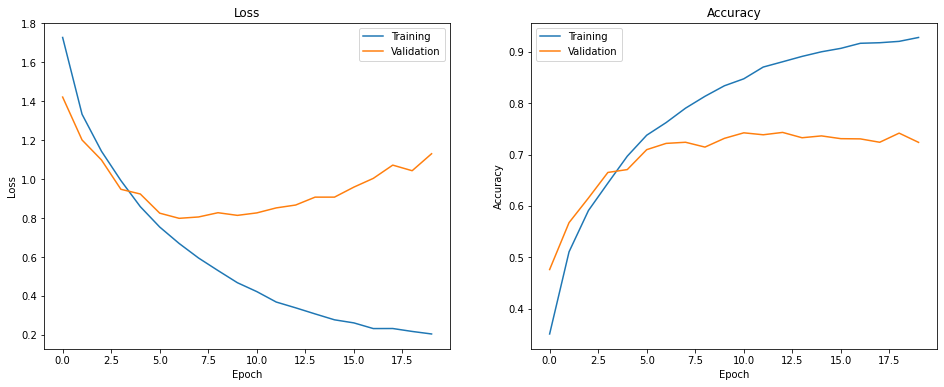

In [ ]:
##### YOUR CODE STARTS #####
# plot the progress curves here
plot_curves(history)
##### YOUR CODE ENDS ##### (please do not delete this line)

In [ ]:
##### YOUR CODE STARTS #####
# evaluate the model here
model.evaluate(X_test_norm, y_test)
##### YOUR CODE ENDS ##### (please do not delete this line)

313/313 [==============================] - 2s 7ms/step - loss: 1.1143 - accuracy: 0.7273


[1.1143335103988647, 0.7272999882698059]

<font color='red'> Your insightful interpretation of the results goes here: With 5 epochs, we had an accuracy of 0.65. By training again, with 20 epochs, we have this time 0.73 for the accuracy. So we can see that it's better (normal because more epochs). But with a droprate of 0.25 (previously) with 20 epochs, we had better result (0.75 for the accuracy). So maybe we can't really compare theses models with one training. </font>

## Augmentation

As we discussed in the lecture, augmentation is one of the most simple, yet effective ways to improve generalisation of many machine learning models. Unfortunately, not all types of data can be easily augmented (e.g. tabular data, or some sounds). Here we look at image augmentation techniques using Keras builtin `ImageDataGenerator` class (https://keras.io/preprocessing/image/).

In [ ]:
%tensorflow_version 1.x
from keras.preprocessing.image import ImageDataGenerator

TensorFlow is already loaded. Please restart the runtime to change versions.


Let's load our CIFAR10 again.

In [ ]:
# A bit of setup again
import numpy as np
import matplotlib.pyplot as plt

# loading in the cifar10 dataset
from keras.datasets import cifar10

# Keras comes with built-in loaders for common datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# shorten dataset for quicker training
X_train = X_train[:25000]
y_train = y_train[:25000]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (25000, 32, 32, 3)
Train labels shape:  (25000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


`ImageDataGenerator` is a framework that is used to apply a sereis of transformations (also knowns as augmentations) to the input images. Here is an example of simple augmentation pipeline using `ImageDataGenerator`:

In [ ]:
datagen = ImageDataGenerator(rotation_range=90, # randomly rotate an image from 0 to 90 degrees
                 width_shift_range=0.1,  # horizontally shift an image by a fraction of 0% - 10% (of original width)   
                 height_shift_range=0.1, # vertically shift an image by a fraction of 0% - 10% (of original height)   
                 horizontal_flip=True) # horizontaly flip random 30% of images 

# assign augmentation pipeline to our data
datagen.fit(X_train)

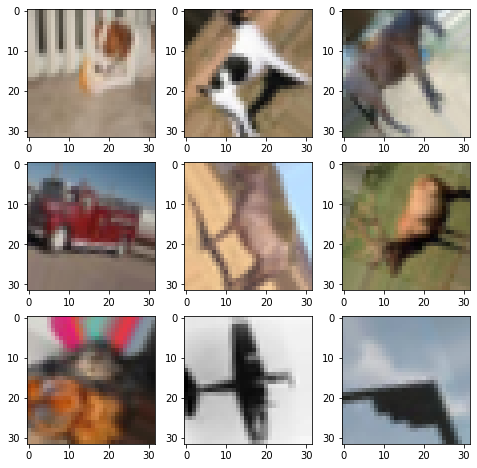

In [ ]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(3, 3, 1 + i)
        plt.imshow(X_batch[i].astype('uint8').reshape(32, 32, 3))
    # show the plot
    plt.show()
    break

Data generators in Keras do not have `validation_split` option for training. Why?
Here we create a separate validation set:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 111, test_size = 0.10)

print(X_train.shape)
print(X_val.shape)

(22500, 32, 32, 3)
(2500, 32, 32, 3)


In [ ]:
mu = X_train.mean(axis=(0,1,2)) # finds mean of R, G and B separately
std = X_train.std(axis=(0,1,2)) # same for std
X_train_norm = (X_train - mu)/std
X_val_norm = (X_val - mu)/std
X_test_norm = (X_test - mu)/std

Let's use the same simple augmentation schema as we defined before, but instead of 0 to 90 degrees, limit random rotation range from 0 to 15 degrees: 

In [ ]:
##### YOUR CODE STARTS #####

#data augmentation
datagen = ImageDataGenerator(rotation_range=15, # randomly rotate an image from 0 to 90 degrees
                 width_shift_range=0.1,  # horizontally shift an image by a fraction of 0% - 10% (of original width)   
                 height_shift_range=0.1, # vertically shift an image by a fraction of 0% - 10% (of original height)   
                 horizontal_flip=True) # horizontaly flip random 30% of images 
# assign augmentation schema to X_train_norm
datagen.fit(X_train_norm)
##### YOUR CODE ENDS ##### (please do not delete this line)

In [ ]:
# Create a model 
model = define_model(0.00001)

# Compile the model as before (code is identical)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])

# instead of using .fit() we use .fit_generator() 
# .fit_generator trains the model on a batch by batch basis
# each batch is created by datagen.flow function that we saw before
history = model.fit_generator(datagen.flow(X_train_norm, y_train, batch_size=64),
                    steps_per_epoch=X_train_norm.shape[0]//64, # number of steps per epochs, needs to be specified as we do augmentation
                    epochs=25,
                    verbose=1,
                    validation_data=(X_val_norm,y_val)
                    )


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
351/351 [==============================] - 18s 50ms/step - loss: 1.7509 - accuracy: 0.1041 - val_loss: 1.3903 - val_accuracy: 0.1028
Epoch 2/25
351/351 [==============================] - 17s 48ms/step - loss: 1.3609 - accuracy: 0.1005 - val_loss: 1.2564 - val_accuracy: 0.0812
Epoch 3/25
351/351 [==============================] - 17s 49ms/step - loss: 1.1850 - accuracy: 0.0995 - val_loss: 0.9762 - val_accuracy: 0.0948
Epoch 4/25
351/351 [==============================] - 18s 50ms/step - loss: 1.0559 - accuracy: 0.1003 - val_loss: 0.8881 - val_accuracy: 0.0836
Epoch 5/25
351/351 [==============================] - 17s 49ms/step - loss: 0.9766 - accuracy: 0.0996 - val_loss: 0.8087 - val_accuracy: 0.1160
Epoch 6/25
351/351 [==============================] - 17s 48ms/step - loss: 0.9050 - accuracy: 0.1018 - val_loss: 0.8037 - val_accuracy: 0.1284
Epoch 7/25
351/351 [==============================] - 17s 48

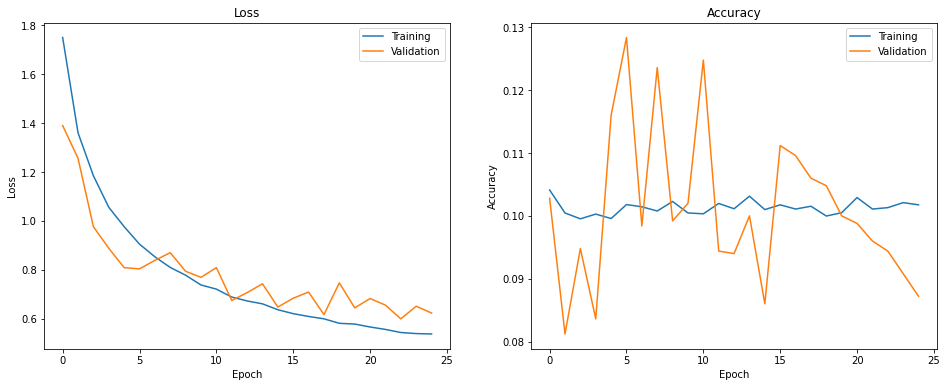

In [ ]:
plot_curves(history)

In [ ]:
# Loss and accuracy on test set
model.evaluate(X_test_norm, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.6915 - accuracy: 0.0922


[0.6914582252502441, 0.09220000356435776]

## Homework exercise 3 (3 points): applying more sophisticated augmentation pipelines
<font color='red'> Check https://keras.io/preprocessing/image/ and add more interesting transformation into the above pipeline. Train your network again, and interpret the results. </font>

<font color='red'> **(Homework exercise 3- a)** Add at least 2-3 more different transformations described at https://keras.io/preprocessing/image/. Visualise these augmentations on CIFAR10 images (as we have done for the simple pipeline). Briefly explain your choise (why these augmentation you added will help). **(1 point)**. </font>


In [ ]:
datagen_2 = ImageDataGenerator(featurewise_center=True, #by setting input mean to 0 over the dataset, i think it will help
                 featurewise_std_normalization=True, #dividing the inputs by std of the dataset could also help the augmentation
                 rotation_range=15,
                 width_shift_range=0.1,  
                 height_shift_range=0.1,
                 vertical_flip=True, #like add horizontal_flip, i think vertical_flip can be useful as well
                 horizontal_flip=True) 
datagen_2.fit(X_train_norm)

<font color='red'> **(Homework exercise 3- b)** Retrain the model using this new augmented training set, test this new model on the non-augmented test set data. **(1 point)**. </font>

In [ ]:
model = define_model(0.00001)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])

history = model.fit_generator(datagen_2.flow(X_train_norm, y_train, batch_size=64),
                    steps_per_epoch=X_train_norm.shape[0]//64, # number of steps per epochs, needs to be specified as we do augmentation
                    epochs=20,
                    verbose=1,
                    validation_data=(X_val_norm,y_val)
                    )

Epoch 1/20
351/351 [==============================] - 18s 52ms/step - loss: 1.8592 - accuracy: 0.1125 - val_loss: 1.6101 - val_accuracy: 0.1588
Epoch 2/20
351/351 [==============================] - 18s 51ms/step - loss: 1.5536 - accuracy: 0.1026 - val_loss: 1.3678 - val_accuracy: 0.0760
Epoch 3/20
351/351 [==============================] - 18s 50ms/step - loss: 1.4023 - accuracy: 0.1014 - val_loss: 1.4774 - val_accuracy: 0.1128
Epoch 4/20
351/351 [==============================] - 18s 51ms/step - loss: 1.2853 - accuracy: 0.0995 - val_loss: 1.1516 - val_accuracy: 0.0968
Epoch 5/20
351/351 [==============================] - 17s 50ms/step - loss: 1.2104 - accuracy: 0.0990 - val_loss: 1.2831 - val_accuracy: 0.0848
Epoch 6/20
351/351 [==============================] - 18s 52ms/step - loss: 1.1361 - accuracy: 0.1000 - val_loss: 1.2051 - val_accuracy: 0.0736
Epoch 7/20
351/351 [==============================] - 18s 50ms/step - loss: 1.0865 - accuracy: 0.0973 - val_loss: 1.0340 - val_accuracy:


<font color='red'> **(Homework exercise 3- c)** Plot the performance curves (loss and accuracy) and interpret the results. Did the performance improve? Why? Why not? **(1 point)**. </font>

313/313 [==============================] - 2s 7ms/step - loss: 0.8859 - accuracy: 0.0927


[0.8859049677848816, 0.09269999712705612]

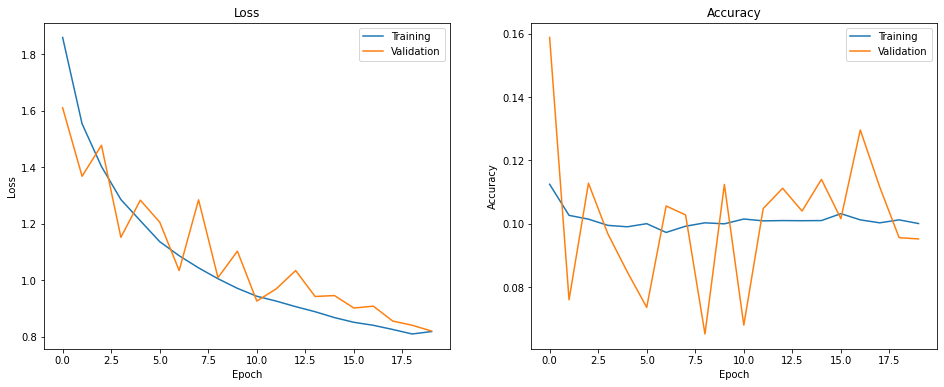

In [ ]:
plot_curves(history)
model.evaluate(X_test_norm, y_test)

Answer to (**c**) goes here: Clearly, it's not better, maybe even worse. Loss is worse with what I added and accuracy is quite similar. I don't know what can be change, maybe we have to see images on the dataset, and think about a specitif augmentation for which type of images are in the dataset.

# Bonus exercises
*(NB, these are optional exercises!)*
 

## Bonus exercise 1 (up to 4 bonus points depending on presentation):
<font color='red'> Experimentally verify if CutMix augmentation helps to improve the test score on CIFAR10 (not clear, as images are very tiny). Link to the CutMix paper: https://arxiv.org/abs/1905.04899. Show couple of examples of CutMix augmented images and your implementation along with performance curves and scores. Compare the results of CutMix augmented model and the model without data augmentation. </font>


In [ ]:
##### YOUR CODE STARTS #####

##### YOUR CODE ENDS ##### (please do not delete this line)

In [ ]:
#Comparison part
##### YOUR CODE STARTS #####

##### YOUR CODE ENDS ##### (please do not delete this line)

Your explanation:

## Bonus exercise 2 (2 points):

<font color='red'> Implement basic linear regression and Ridge regression using the closed form solutions (https://stats.stackexchange.com/questions/69205/how-to-derive-the-ridge-regression-solution). Run your implementations on the following synthetic dataset. Compare model coefficients to coefficients produced by `sklearn` functions `LinearRegression` and `Ridge`. Speculate about the difference in coefficients that you observe. </font>

In [ ]:
# here we generate a synthetic dataset:
from sklearn.datasets import make_regression

X, y, coefficients = make_regression(
    n_samples=50,
    n_features=4,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1
)

X.shape

<font color='red'> Implement closed form solutions for both baseline linear regression and ridge regression (https://stats.stackexchange.com/questions/69205/how-to-derive-the-ridge-regression-solution) on the synthetic dataset: </font>



In [ ]:
n, m = X.shape
I = np.identity(m)
lambda_ = 1

##### YOUR CODE STARTS #####

# Implement baseline linear regression (closed form solution)

lr_coef = ...
lr_intercept = ...


# Implement Ridge regression (closed form solution)
lr_ridge_coef = ...
lr_rigde_intercept = ...


##### YOUR CODE ENDS ##### (please do not delete this line)

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialise Linear Regression model from sklearn: 
lr = LinearRegression()
lr.fit(X, y)

In [ ]:
print(lr.coef_)
print(lr.intercept_)

In [ ]:
from sklearn.linear_model import Ridge

lr_ridge = Ridge(lambd, solver='cholesky')
lr_ridge.fit(X, y)

In [ ]:
print(lr_ridge.coef_)
print(lr_ridge.intercept_)

<font color='red'>  Compare coefficients you obtained using closed form solution and sklearn implementations. Comment on the difference you observe. </font>



In [ ]:
##### YOUR CODE STARTS #####
print(f"Manually calculated W1 = {}, W0 = {}")
print(f"Sklearn implementation W1 = {}, W0 = {}")
##### YOUR CODE ENDS ##### (please do not delete this line)

<font color='red'>Your textual answer explaining the difference between coefficients goes here:</font>

# Comments (optional feedback to the course instructors)
Here, please, leave your comments regarding the homework, possibly answering the following questions: 
* how much time did you send on this homework?
* was it too hard/easy for you?
* what would you suggest to add or remove?
* anything else you would like to tell us